# Package Import

In [2]:
import re
import glob
import os

import pandas as pd 

import pylint.lint
import nbformat

import numpy as np
import math

import sqlite3

from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import kstest
from scipy.stats import mannwhitneyu
from scipy.stats import kendalltau
from scipy import stats
from scipy.stats import chi2_contingency

from cliffs_delta import cliffs_delta
import rbo

import seaborn as sns
from matplotlib import pyplot as plt

# DB Connection SQlite

In [81]:
conn = sqlite3.connect(r"data/nb_pylint_result.db")

In [82]:
df_ratings = pd.read_sql_query("SELECT * from NBRATING", conn)
df_nbfiles = pd.read_sql_query("SELECT * from NBFILES", conn)

df_rating_with_type = pd.merge(df_ratings, df_nbfiles,  how='left', left_on=['Filename'], right_on = ['Filename'])
df_rating_with_type

,Filename,Rating,Type
0,nb_data/part_1/KT_dataset/jixunchen_lung-segme...,0.00,nonml
1,nb_data/part_1/KT_dataset/kerneler_starter-new...,1.69,ml
2,nb_data/part_1/KT_dataset/dengjingyuan_simple-...,7.35,ml
3,nb_data/part_1/KT_dataset/pdthomsen_learn-pyth...,0.00,nonml
4,nb_data/part_1/KT_dataset/poojanagure_biginer-...,0.00,ml
...,...,...,...
246594,nb_data/part_9/KT_dataset/ruiknemui_kernel2daf...,2.79,ml
246595,nb_data/part_9/KT_dataset/aerrkhis_titanic-cha...,0.00,ml
246596,nb_data/part_9/KT_dataset/prashdash112_911-cal...,9.42,nonml
246597,nb_data/part_9/KT_dataset/peaceagent_resnext10...,2.75,ml


In [70]:
df_nbfiles[:1].Filename[0]

'nb_data/part_1/KT_dataset/jixunchen_lung-segmentation-and-candidate-points-generation.ipynb'

# Dataset Description

In [71]:
df_dataset_description = pd.read_csv("data/nb_dataset_loc_sloc.csv")

Here we use only executive code line (sloc) as LOC 

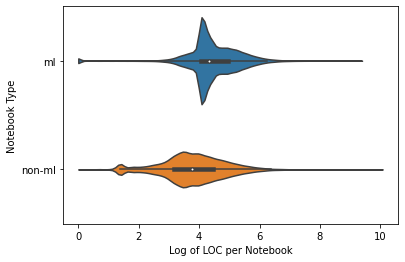

In [7]:
fig = sns.violinplot(data=df_dataset_description, x="logsloc", y="type", cut=0)
fig.set(xlabel='Log of LOC per Notebook', ylabel='Notebook Type')

fig.figure.savefig('sloc_bean.pdf', bbox_inches="tight")
fig.figure.show()

In [72]:
df_dataset_description

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Filename,loc,sloc,type,logloc,logsloc
0,0,0,0,kerneler_starter-chicago-sex-offenders-e8744bf...,169,87,ml,5.129899,4.465908
1,1,1,1,turksoyomer_deep-learning-methods-on-malaria-c...,304,134,ml,5.717028,4.897840
2,2,2,2,thomascong_dirnet.py,608,388,ml,6.410175,5.961005
3,3,3,3,discdiver_testing-prophet-for-time-series-pred...,590,143,non-ml,6.380123,4.962845
4,4,4,4,ritayandhara_lin-regression-class-fromscratch.py,170,74,ml,5.135798,4.304065
...,...,...,...,...,...,...,...,...,...
242359,242359,242359,242359,kerneler_starter-modified-arabic-handwritten-6...,106,59,ml,4.663439,4.077537
242360,242360,242360,242360,anshulkataria_exercise-underfitting-and-overfi...,131,32,ml,4.875197,3.465736
242361,242361,242361,242361,ratamjose_a-complete-m5-exploratory-data-analy...,888,586,non-ml,6.788972,6.373320
242362,242362,242362,242362,jefffan27_911-calls-exploratory-data-analysis.py,362,55,non-ml,5.891644,4.007333


## Median of Line of Code

Median of Line of Code in ML Notebooks

In [9]:
df_dataset_description[df_dataset_description.type == 'ml'].sloc.median()

75.0

Median of Line of Code in Non-ML Notebooks

In [10]:
df_dataset_description[df_dataset_description.type == 'non-ml'].sloc.median()

43.0

## Line of Code Normality Check

In [11]:
stats.kstest(df_dataset_description[df_dataset_description['type']=='ml']['sloc'],  'norm')

KstestResult(statistic=0.9878631988999977, pvalue=0.0)

In [12]:
stats.kstest(df_dataset_description[df_dataset_description['type']=='non-ml']['sloc'],  'norm')

KstestResult(statistic=0.9963626726309959, pvalue=0.0)

## Line of Code Mann Whitney U Test

In [13]:
s, p = stats.mannwhitneyu(df_dataset_description[df_dataset_description['type']=='ml']['sloc'], df_dataset_description[df_dataset_description['type']=='non-ml']['sloc'])
d, res = cliffs_delta( df_dataset_description[df_dataset_description['type']=='ml']['sloc'], df_dataset_description[df_dataset_description['type']=='non-ml']['sloc'])

print (s, p, d, res)

8416363936.5 0.0 0.41166847702524634 medium


In [ ]:
df_dataset_description[df_dataset_description['type']=='ml']

In [1889]:

ml_nb_2 = df_dataset_description[df_dataset_description['type']=='ml']
nonml_nb_2 = df_dataset_description[df_dataset_description['type']=='non-ml']

unique_freq_sloc = df_dataset_description.sloc.unique()

sloc_ml_2_list, sloc_nonml_2_list = [], [] 

for unique_sloc in unique_freq_sloc:
    sloc_ml_2 = ml_nb_2[ml_nb_2.sloc == unique_sloc]
    sloc_nonml_2 = nonml_nb_2[nonml_nb_2.sloc == unique_sloc]

    sloc_ml_2_list.append(len(sloc_ml_2))
    sloc_nonml_2_list.append(len(sloc_nonml_2))

    
obs = np.array([sloc_ml_2_list, sloc_nonml_2_list])

X2,p, dof, expected = stats.chi2_contingency(obs, correction=False)
N = np.sum(obs)
minimum_dimension = min(obs.shape)-1
  
# Calculate Cramer's V
result = np.sqrt((X2/N) / minimum_dimension)

print (N, obs.shape, X2/N)
  
# Print the result
print('Chi-Square: ', X2,  '  p_value:  ',  p,  'Effect Size Cramers V: ', result)

242364 (2, 1354) 0.25649720170681567
Chi-Square:  62165.68779447068   p_value:   0.0 Effect Size Cramers V:  0.5064555278667769


# RQ1: How does Jupyter Notebook code quality differ between ML and non-ML projects?

In [14]:
df_rating_with_type = pd.merge(df_ratings, df_nbfiles,  how='left', left_on=['Filename'], right_on = ['Filename'])
df_rating_with_type

,Filename,Rating,Type
0,nb_data/part_1/KT_dataset/jixunchen_lung-segme...,0.00,nonml
1,nb_data/part_1/KT_dataset/kerneler_starter-new...,1.69,ml
2,nb_data/part_1/KT_dataset/dengjingyuan_simple-...,7.35,ml
3,nb_data/part_1/KT_dataset/pdthomsen_learn-pyth...,0.00,nonml
4,nb_data/part_1/KT_dataset/poojanagure_biginer-...,0.00,ml
...,...,...,...
246594,nb_data/part_9/KT_dataset/ruiknemui_kernel2daf...,2.79,ml
246595,nb_data/part_9/KT_dataset/aerrkhis_titanic-cha...,0.00,ml
246596,nb_data/part_9/KT_dataset/prashdash112_911-cal...,9.42,nonml
246597,nb_data/part_9/KT_dataset/peaceagent_resnext10...,2.75,ml


In [15]:
df_rating_with_type[:1].Filename[0]

'nb_data/part_1/KT_dataset/jixunchen_lung-segmentation-and-candidate-points-generation.ipynb'

In [16]:
df_ml_rating = df_rating_with_type[df_rating_with_type['Type'] == 'ml']
df_nonml_rating = df_rating_with_type[df_rating_with_type['Type'] == 'nonml']
    

In [17]:
df_ml_rating['Rating'].describe()

count    177252.000000
mean          2.345080
std           1.954281
min           0.000000
25%           0.360000
50%           2.240000
75%           3.520000
max           9.730000
Name: Rating, dtype: float64

In [18]:
df_nonml_rating['Rating'].describe()

count    69347.000000
mean         3.262127
std          2.915291
min          0.000000
25%          0.000000
50%          3.260000
75%          5.810000
max         10.000000
Name: Rating, dtype: float64

## Statistical Test

### Normality Check of Code Quality Rating Distribution

In [19]:
# null hypothesis > 0.05: issue distribution comes from a normal distribution
s1, p1 = stats.kstest(df_ml_rating['Rating'],  'norm')
print ('ML NB Ratings', s1, p1, "Normal Distribution" if p1 > 0.05 else "Not Normal Distribution")

s2, p2 = stats.kstest(df_nonml_rating['Rating'],  'norm')
print ('Non-ML NB Ratings', s2, p2, "Normal Distribution" if p2 > 0.05 else "Not Normal Distribution")


ML NB Ratings 0.5833427915118812 0.0 Not Normal Distribution
Non-ML NB Ratings 0.5639803682897546 0.0 Not Normal Distribution


### Mann Whitney U Test

In [22]:
statistic, p = stats.mannwhitneyu(df_ml_rating['Rating'], df_nonml_rating['Rating'])
if ( p < 0.05):
    result = cliffs_delta( df_ml_rating['Rating'], df_nonml_rating['Rating'])

print ('MWU: ', statistic, ";  p_value: ", p, "; Cliffs d:", abs(round(result[0], 2)))

MWU:  5244115092.0 ;  p_value:  0.0 ; Cliffs d: 0.15


### Skewness and Kartiosys 

In [29]:
# Calculate the skewness
print('Skewness ML Ratings: ', round(skew(df_ml_rating['Rating'], axis=0, bias=True), 2))

print('Skewness non-ML Ratings: ', round(skew(df_nonml_rating['Rating'], axis=0, bias=True), 2))

Skewness ML Ratings:  0.6
Skewness non-ML Ratings:  0.23


In [31]:
# Calculate the kurtosis
print('kurtosis ML Ratings: ', round(kurtosis(df_ml_rating['Rating'], axis=0, bias=True), 2))

print('kurtosis non-ML Ratings: ', round(kurtosis(df_nonml_rating['Rating'], axis=0, bias=True), 2))

kurtosis ML Ratings:  -0.21
kurtosis non-ML Ratings:  -1.37


In [32]:
df_rating_with_type

,Filename,Rating,Type
0,nb_data/part_1/KT_dataset/jixunchen_lung-segme...,0.00,nonml
1,nb_data/part_1/KT_dataset/kerneler_starter-new...,1.69,ml
2,nb_data/part_1/KT_dataset/dengjingyuan_simple-...,7.35,ml
3,nb_data/part_1/KT_dataset/pdthomsen_learn-pyth...,0.00,nonml
4,nb_data/part_1/KT_dataset/poojanagure_biginer-...,0.00,ml
...,...,...,...
246594,nb_data/part_9/KT_dataset/ruiknemui_kernel2daf...,2.79,ml
246595,nb_data/part_9/KT_dataset/aerrkhis_titanic-cha...,0.00,ml
246596,nb_data/part_9/KT_dataset/prashdash112_911-cal...,9.42,nonml
246597,nb_data/part_9/KT_dataset/peaceagent_resnext10...,2.75,ml


## Graph for RQ1

In [35]:
df_graph_for_rq1 = df_rating_with_type

In [36]:
df_graph_for_rq1

,Filename,Rating,Type
0,nb_data/part_1/KT_dataset/jixunchen_lung-segme...,0.00,nonml
1,nb_data/part_1/KT_dataset/kerneler_starter-new...,1.69,ml
2,nb_data/part_1/KT_dataset/dengjingyuan_simple-...,7.35,ml
3,nb_data/part_1/KT_dataset/pdthomsen_learn-pyth...,0.00,nonml
4,nb_data/part_1/KT_dataset/poojanagure_biginer-...,0.00,ml
...,...,...,...
246594,nb_data/part_9/KT_dataset/ruiknemui_kernel2daf...,2.79,ml
246595,nb_data/part_9/KT_dataset/aerrkhis_titanic-cha...,0.00,ml
246596,nb_data/part_9/KT_dataset/prashdash112_911-cal...,9.42,nonml
246597,nb_data/part_9/KT_dataset/peaceagent_resnext10...,2.75,ml


In [37]:
x = df_graph_for_rq1[df_graph_for_rq1.Type == 'ml']
y = df_graph_for_rq1[df_graph_for_rq1.Type == 'nonml']


In [38]:
x.Rating.to_numpy()

array([1.69, 7.35, 0.  , ..., 0.  , 2.75, 2.24])

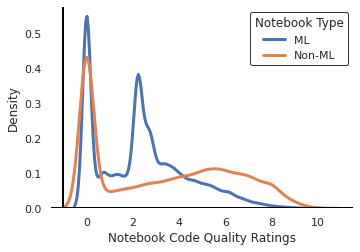

In [39]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

sns.set(font_scale=1)

fig, ax = plt.subplots()
plt.grid(False)
ax.set_facecolor('white')
# ax.spines['bottom'].set_color('black')
# ax.spines['left'].set_color('black')
plt.subplots_adjust(left=0.2,bottom=0.2, top = 0.9, right = 0.9)

array1 = x.Rating.to_numpy()
array2 = y.Rating.to_numpy()

# Create a density plot for each array
sns.kdeplot(array1, label="ML ", ax=ax, lw=3)
sns.kdeplot(array2, label="Non-ML", ax=ax, lw=3)

sns.despine(left=True, bottom=True)

# Add labels to the x-axis and y-axis
plt.xlabel('Notebook Code Quality Ratings')
plt.ylabel('Density')

plt.axhline(0, color='black', lw=3)
plt.axvline(-1, color='black', lw=2)

# Add a legend to the plot
plt.legend(title = 'Notebook Type', facecolor="white", edgecolor="black")

# Display the plot
plt.show()

fig.savefig("rating_v2.pdf", format="pdf", transparent=True)

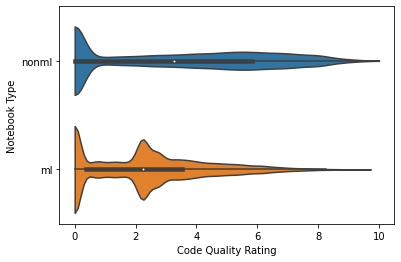

In [30]:
fig = sns.violinplot(data=df_rating_with_type, x="Rating", y="Type", cut=0)
fig.set(xlabel='Code Quality Rating', ylabel='Notebook Type')

fig.figure.savefig('rating.pdf', bbox_inches="tight")

fig.figure.show()

Density plots are drawn in R.  

```R
library("xlsx")
data_rating <- read_excel(file.choose())

# Change density plot fill colors by groups
ggplot(data_rating, aes(x=Rating, fill=Type, alpha=0.0)) +
    geom_density()+
    xlab("Notebook Ratings") +
    theme(legend.position = c(0.8, 1))
```

# RQ2: Where do the Jupyter Notebook code style issues vary from ML to non-ML projects?

## Chi Square Test for checking the difference

In [59]:
df_issue_freq_all = pd.read_sql_query("SELECT * from issueFrewquency", conn)
df_issue_freq_all

for issue_first_letter in ['E', 'C', 'W', 'R']: 
    df_issue_cat_3 = df_issue_freq_all[df_issue_freq_all.Code.str.startswith(issue_first_letter)]
    _calculating_chi_square_omnibus_test(df_issue_cat_3)

E : X2: 37.088 Critical: 82.55 DoF: 47 P: 0.001042 Not Reject Cramers V: 0.431
C : X2: 5.006 Critical: 62.427 DoF: 33 P: 0.001471 Not Reject Cramers V: 0.158
W : X2: 13.721 Critical: 124.599 DoF: 78 P: 0.000633 Not Reject Cramers V: 0.262
R : X2: 23.012 Critical: 85.351 DoF: 49 P: 0.001 Not Reject Cramers V: 0.339


In [56]:
def _calculating_chi_square_omnibus_test(df_issue_with_cat_3):
    df_contigency_table = _chi_square_contigency_table_genaration_v2_omit_zero(df_issue_with_cat_3)

    df_contigency_table['ML_Percent'] = df_contigency_table['ML'] / df_contigency_table['ML'].sum() * 100
    df_contigency_table['Non-ML_Percent'] = df_contigency_table['Non-ML'] / df_contigency_table['Non-ML'].sum() * 100
    
    
   # Pearson chi-square
    obs = np.array([df_contigency_table['ML_Percent'], df_contigency_table['Non-ML_Percent']])
    X2_calculated,p_value, dof, expected = stats.chi2_contingency(obs)
    N = np.sum(obs)
    minimum_dimension = min(obs.shape)-1

    # Calculate Cramer's V
    cramerV = np.sqrt((X2_calculated/ (N * minimum_dimension)))
    
    #     Bonferroni correction
    p = .05 / len(df_contigency_table['ML_Percent'])
    
    X2_critical = stats.chi2.ppf(1 - p, dof)
    status = 'Not Reject' if (X2_critical > X2_calculated) else 'Reject' 

    # Print the result
    print(issue_first_letter, ':', 'X2:', X2_calculated.round(3), 'Critical:', X2_critical.round(3), 'DoF:', dof,'P:',  round(p, 6), status,  'Cramers V:', cramerV.round(3))

In [58]:
def _chi_square_contigency_table_genaration_v2_omit_zero(df_issue_cat_2):
    
    df_issue_cat_2_ml = df_issue_cat_2[df_issue_cat_2.Type == 'ml']
    df_issue_cat_2_nonml = df_issue_cat_2[df_issue_cat_2.Type == 'nonml']

    all_issue_code_2 = df_issue_cat_2.Code.unique()
    
#     Consider the number of occurance of the specific issue code
    issue_valuecount_ml_2 = df_issue_cat_2_ml.groupby('Code')['Frequency'].sum()
    issue_valuecount_nonml_2 = df_issue_cat_2_nonml.groupby('Code')['Frequency'].sum()

    code_list_chi, ml_list_chi, nonml_list_chi = [], [], []

    # code wise issue frequency count 
    for code in all_issue_code_2:

        if ( code in issue_valuecount_ml_2.index) and (code in issue_valuecount_nonml_2.index):
            ml_list_chi.append(issue_valuecount_ml_2[code])
            nonml_list_chi.append(issue_valuecount_nonml_2[code])
            code_list_chi.append(code)

    data = pd.DataFrame({'Code': code_list_chi, 'ML':ml_list_chi, 'Non-ML':nonml_list_chi})
    data.set_index('Code')
    return data

## Calculating Residuals 

In [63]:
df_issue_freq_all = pd.read_sql_query("SELECT * from issueFrewquency", conn)
df_issue_freq_all

,Filename,Code,Frequency,Type
0,nb_data/part_1/KT_dataset/jixunchen_lung-segme...,C0303,18,nonml
1,nb_data/part_1/KT_dataset/jixunchen_lung-segme...,W0611,15,nonml
2,nb_data/part_1/KT_dataset/jixunchen_lung-segme...,C0121,9,nonml
3,nb_data/part_1/KT_dataset/jixunchen_lung-segme...,E0401,9,nonml
4,nb_data/part_1/KT_dataset/jixunchen_lung-segme...,W0105,8,nonml
...,...,...,...,...
2773971,nb_data/part_9/KT_dataset/kerneler_starter-rou...,E0401,1,ml
2773972,nb_data/part_9/KT_dataset/kerneler_starter-rou...,W0612,1,ml
2773973,nb_data/part_9/KT_dataset/kerneler_starter-rou...,W0621,1,ml
2773974,nb_data/part_9/KT_dataset/kerneler_starter-rou...,C0209,1,ml


In [64]:
for issue_first_letter in ['E', 'C', 'W', 'R']: 
    df_issue_cat_3 = df_issue_freq_all[df_issue_freq_all.Code.str.startswith(issue_first_letter)]
    df_residuals = calculate_residuals(df_issue_cat_3)
    print (df_residuals)
    
    df_residuals.to_csv('residuals_'+issue_first_letter+'.csv')

     Code      ML  Non-ML  Residual      Std_Res  Total_Percent  ML_Percent  \
0   E0401  748983   79048    669935  2382.797987      61.174717   66.378900   
1   E0602  151569  104236     47333   146.607154      18.898808   13.432860   
2   E1121   43265   16753     26512   204.831241       4.434114    3.834377   
3   E0102    9919    6899      3020    36.359162       1.242510    0.879075   
4   E0601    3465     869      2596    88.063268       0.320195    0.307087   
5   E1101   97152    4819     92333  1330.082206       7.533591    8.610133   
6   E1137     921     580       341    14.159254       0.110893    0.081624   
7   E0611   54851    4713     50138   730.328563       4.400573    4.861191   
8   E1136    4183    2530      1653    32.863408       0.495955    0.370720   
9   E1120    2496     530      1966    85.397583       0.223560    0.221209   
10  E1123    2894     294      2600   151.635079       0.235529    0.256482   
11  E1130     397      94       303    31.252064    

In [61]:
def calculate_residuals(df_issue_with_cat_3):
    # df_contigency_table = _chi_square_contigency_table_genaration(df_issue_with_cat_3)
    df_contigency_table = _chi_square_contigency_table_genaration_v2_omit_zero(df_issue_with_cat_3)
    
    df_contigency_table['Residual'] = df_contigency_table['ML'] - df_contigency_table['Non-ML']
    df_contigency_table['Std_Res'] = (df_contigency_table['ML'] - df_contigency_table['Non-ML']) / df_contigency_table['Non-ML'].apply(lambda x: math.sqrt(x))
    
    df_contigency_table['Total_Percent'] = (df_contigency_table['ML'] + df_contigency_table['Non-ML']) / (df_contigency_table['ML'].sum() + df_contigency_table['Non-ML'].sum() ) * 100
    df_contigency_table['ML_Percent'] = df_contigency_table['ML'] / df_contigency_table['ML'].sum() * 100
    df_contigency_table['Non-ML_Percent'] = df_contigency_table['Non-ML'] / df_contigency_table['Non-ML'].sum() * 100
    df_contigency_table['Residual_Percent'] = df_contigency_table['ML_Percent'] - df_contigency_table['Non-ML_Percent']
    df_contigency_table['Std_Res_Percent'] = (df_contigency_table['ML_Percent'] - df_contigency_table['Non-ML_Percent']) / df_contigency_table['Non-ML_Percent'].apply(lambda x: math.sqrt(x))

    return (df_contigency_table)

## Dealing with R1725

In [74]:
df_issue_freq_all = pd.read_sql_query("SELECT * from issueFrewquency", conn)
df_issue_freq_all


,Filename,Code,Frequency,Type
0,nb_data/part_1/KT_dataset/jixunchen_lung-segme...,C0303,18,nonml
1,nb_data/part_1/KT_dataset/jixunchen_lung-segme...,W0611,15,nonml
2,nb_data/part_1/KT_dataset/jixunchen_lung-segme...,C0121,9,nonml
3,nb_data/part_1/KT_dataset/jixunchen_lung-segme...,E0401,9,nonml
4,nb_data/part_1/KT_dataset/jixunchen_lung-segme...,W0105,8,nonml
...,...,...,...,...
2773971,nb_data/part_9/KT_dataset/kerneler_starter-rou...,E0401,1,ml
2773972,nb_data/part_9/KT_dataset/kerneler_starter-rou...,W0612,1,ml
2773973,nb_data/part_9/KT_dataset/kerneler_starter-rou...,W0621,1,ml
2773974,nb_data/part_9/KT_dataset/kerneler_starter-rou...,C0209,1,ml


In [75]:
df_issue_r1725 = df_issue_freq_all[df_issue_freq_all.Code == 'R1725']
df_issue_r1725

,Filename,Code,Frequency,Type
809,nb_data/part_1/KT_dataset/sfzero_focal-loss-ho...,R1725,7,ml
2406,nb_data/part_1/KT_dataset/solyoh21_6f70656.ipynb,R1725,1,nonml
2948,nb_data/part_1/KT_dataset/scirpus_1-mpnn.ipynb,R1725,6,ml
3248,nb_data/part_1/KT_dataset/danlester_pytorch-ex...,R1725,1,ml
3646,nb_data/part_1/KT_dataset/gpreda_google-landma...,R1725,1,nonml
...,...,...,...,...
2768743,nb_data/part_9/KT_dataset/qhd0081_qhd-qiqc-fin...,R1725,6,ml
2771034,nb_data/part_9/KT_dataset/chopinforest1986_eff...,R1725,1,ml
2771900,nb_data/part_9/KT_dataset/orionpax00_bert-base...,R1725,1,ml
2773880,nb_data/part_9/KT_dataset/utkarshtripathi_pand...,R1725,1,ml


In [76]:
df_issue_r1725[df_issue_r1725.Type == 'ml'].sort_values(by='Frequency', ascending=False)

,Filename,Code,Frequency,Type
41529,nb_data/part_1/KT_dataset/livington_kernel261b...,R1725,24,ml
353718,nb_data/part_2/KT_dataset/derure_future-base-4...,R1725,22,ml
1409120,nb_data/part_0/KT_dataset/ssf0921_future-base....,R1725,22,ml
1397226,nb_data/part_0/KT_dataset/ssfailearning_future...,R1725,22,ml
774890,nb_data/part_3/KT_dataset/liuchuanloong_airbus...,R1725,22,ml
...,...,...,...,...
1576825,nb_data/part_0/KT_dataset/cascadenite_pytorch-...,R1725,1,ml
1577298,nb_data/part_0/KT_dataset/dipta007_birdsong-cn...,R1725,1,ml
1577425,nb_data/part_0/KT_dataset/asilvaigor_learning-...,R1725,1,ml
1577630,nb_data/part_0/KT_dataset/ayanmaity_pytorch-cn...,R1725,1,ml


In [84]:
df_issues_v2 = pd.read_sql_query("SELECT * from NBISSUE", conn)


In [88]:
df_issues_v2

,Filename,CellNo,Line,Issue
0,nb_data/part_1/KT_dataset/jixunchen_lung-segme...,1,3,C0303
1,nb_data/part_1/KT_dataset/jixunchen_lung-segme...,1,8,C0301
2,nb_data/part_1/KT_dataset/jixunchen_lung-segme...,1,23,C0301
3,nb_data/part_1/KT_dataset/jixunchen_lung-segme...,1,29,C0301
4,nb_data/part_1/KT_dataset/jixunchen_lung-segme...,2,1,C0303
...,...,...,...,...
13091046,nb_data/part_9/KT_dataset/kerneler_starter-rou...,5,11,C0103
13091047,nb_data/part_9/KT_dataset/kerneler_starter-rou...,5,14,C0209
13091048,nb_data/part_9/KT_dataset/kerneler_starter-rou...,1,5,C0411
13091049,nb_data/part_9/KT_dataset/kerneler_starter-rou...,1,1,W0611


In [90]:
df_issues_v2_R1725 = df_issues_v2[df_issues_v2.Issue == 'R1725']
df_issues_v2_R1725

,Filename,CellNo,Line,Issue
3757,nb_data/part_1/KT_dataset/sfzero_focal-loss-ho...,18,24,R1725
3764,nb_data/part_1/KT_dataset/sfzero_focal-loss-ho...,18,36,R1725
3775,nb_data/part_1/KT_dataset/sfzero_focal-loss-ho...,18,70,R1725
3797,nb_data/part_1/KT_dataset/sfzero_focal-loss-ho...,18,122,R1725
3802,nb_data/part_1/KT_dataset/sfzero_focal-loss-ho...,19,3,R1725
...,...,...,...,...
13067695,nb_data/part_9/KT_dataset/qhd0081_qhd-qiqc-fin...,20,44,R1725
13077329,nb_data/part_9/KT_dataset/chopinforest1986_eff...,1,113,R1725
13080894,nb_data/part_9/KT_dataset/orionpax00_bert-base...,9,3,R1725
13090621,nb_data/part_9/KT_dataset/utkarshtripathi_pand...,5,3,R1725


In [91]:

df_issues_v2_R1725[df_issues_v2_R1725.Filename == 'nb_data/part_1/KT_dataset/livington_kernel261b614ddf.ipynb']

,Filename,CellNo,Line,Issue
196921,nb_data/part_1/KT_dataset/livington_kernel261b...,3,10,R1725
196923,nb_data/part_1/KT_dataset/livington_kernel261b...,3,13,R1725
196935,nb_data/part_1/KT_dataset/livington_kernel261b...,4,15,R1725
196937,nb_data/part_1/KT_dataset/livington_kernel261b...,4,18,R1725
196957,nb_data/part_1/KT_dataset/livington_kernel261b...,5,75,R1725
196968,nb_data/part_1/KT_dataset/livington_kernel261b...,6,34,R1725
196969,nb_data/part_1/KT_dataset/livington_kernel261b...,6,37,R1725
196984,nb_data/part_1/KT_dataset/livington_kernel261b...,7,20,R1725
196990,nb_data/part_1/KT_dataset/livington_kernel261b...,7,35,R1725
197016,nb_data/part_1/KT_dataset/livington_kernel261b...,9,31,R1725


## Dealing with E0401

In [65]:
df_nb_check = df_issue_freq_all[df_issue_freq_all.Code.str.startswith('E')]
df_nb_check_ml = df_nb_check[df_nb_check.Type == 'ml']
df_nb_check_nonml = df_nb_check[df_nb_check.Type == 'nonml']


In [66]:
having_error_in_nb_ml = df_nb_check[df_nb_check.Type == 'ml'].Filename.nunique() / df_issue_freq_all[df_issue_freq_all.Type == 'ml'].Filename.nunique()
having_error_in_nb_nonml = df_nb_check[df_nb_check.Type == 'nonml'].Filename.nunique() / df_issue_freq_all[df_issue_freq_all.Type == 'nonml'].Filename.nunique()

print('% of Notebook having at least one Error Issue.  ', 'ML:', round(having_error_in_nb_ml * 100, 3), '   NonML:', round(having_error_in_nb_nonml * 100, 3))

% of Notebook having at least one Error Issue.   ML: 97.117    NonML: 56.858


In [67]:
having_e0401_in_nb_ml = df_nb_check_ml[df_nb_check_ml.Code == 'E0401'].Filename.nunique() / df_nb_check_ml.Filename.nunique()
having_e0401_in_nb_nonml = df_nb_check_nonml[df_nb_check_nonml.Code == 'E0401'].Filename.nunique() / df_nb_check_nonml.Filename.nunique()

print('% of Notebook having at E0401.  ', 'ML:', round(having_e0401_in_nb_ml * 100, 3), ' NonML:', round(having_e0401_in_nb_nonml * 100, 3))

% of Notebook having at E0401.   ML: 96.126  NonML: 82.43


----- End -----